# 기계학습 (60점)

In [52]:
from IPython.display import display, HTML
display(HTML("<style>.container{width:95% !important;}</style>"))

import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd
import numpy as np
import os
plt.rc("font", family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


### 비트코인 데이터

데이터 경로 : './data/bitcoin_mock.csv'

1분간격의 비트코인 가격에 대한 정보이다. 
- datetime: 1분 단위의 데이터
- open : 시작가
- high : 최고가
- low : 최저가
- close : 종가
- volume : 거래량

In [53]:
df =pd.read_csv('bitcoin_mock.csv')
df.head()

,datetime,open,high,low,close,volume
0,2022-01-01 00:00:00,46216.93,46271.08,46208.37,46250.00,40.57574
1,2022-01-01 00:01:00,46250.00,46344.23,46234.39,46312.76,42.38106
2,2022-01-01 00:02:00,46312.76,46381.69,46292.75,46368.73,51.29955
3,2022-01-01 00:03:00,46368.73,46391.49,46314.26,46331.08,30.45894
4,2022-01-01 00:04:00,46331.07,46336.10,46300.00,46321.34,20.96029


### 기계학습1
모든 데이터 행이 1분간격으로 존재하는지 확인하고 그렇지 않은 경우 누락된 시각의 행을 생성하고 컬럼들의 결측치를 적절히 생성하라.      
결측치가 존재한다면 결측치를 처리하라

In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['diff'] = df['datetime'].diff()
display(df[df['diff']!= '0 days 00:01:00'])
display(df[df['diff']!= '0 days 00:01:00'].nunique())

,datetime,open,high,low,close,volume,diff
0,2022-01-01 00:00:00,46216.93,46271.08,46208.37,46250.00,40.57574,NaT
21440,2022-01-15 21:21:00,43453.43,43456.00,43443.16,43452.27,9.22327,0 days 00:02:00
21757,2022-01-16 02:39:00,43010.02,43017.88,43000.00,43000.00,11.51053,0 days 00:02:00
73347,2022-02-20 22:30:00,38311.35,38311.35,38303.98,38307.70,2.88170,0 days 00:02:00
117580,2022-03-23 15:44:00,42634.99,42674.54,42633.73,42674.53,30.56972,0 days 00:02:00
128033,2022-03-30 21:58:00,46961.50,46964.52,46956.57,46961.51,12.42207,0 days 00:02:00
148204,2022-04-13 22:10:00,41184.35,41205.56,41170.17,41205.55,15.66562,0 days 00:02:00
167296,2022-04-27 04:23:00,38389.85,38389.85,38372.90,38384.24,8.86209,0 days 00:02:00
176478,2022-05-03 13:26:00,38407.10,38407.11,38311.00,38349.14,137.07265,0 days 00:02:00
188309,2022-05-11 18:38:00,30181.90,30200.00,30104.14,30113.44,56.97588,0 days 00:02:00


datetime    26
open        26
high        26
low         26
close       26
volume      26
diff         1
dtype: int64

In [9]:
df.columns[1:-1]

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [12]:
# diff의 분이 1보다 큰 경우 처리
new_rows =[]
for i in range(1, len(df)):
    diff_minutes = df.loc[i, 'diff'].total_seconds() / 60
    if diff_minutes > 1:
        # 여러 개의 새로운 행을 생성
        for j in range(1, int(diff_minutes)):
            new_row = {}
            new_row['datetime'] = df.loc[i-1, 'datetime'] + pd.Timedelta(minutes=j)
            for col in df.columns[1:-1]:
                new_row[col] = round((df.loc[i-1, col] + df.loc[i, col]) / 2, 3)
            new_rows.append((i, new_row))

# 인덱스를 기준으로 새로운 행들을 데이터프레임에 추가
data_dict = {}
for idx, entry in new_rows:
    if idx not in data_dict:
        data_dict[idx] = {}
    data_dict[idx].update(entry)

temp = pd.DataFrame.from_dict(data_dict, orient='index')

# 새로운 행을 기존 데이터프레임에 삽입
for index, row in temp.iterrows():
    df = pd.concat([df.iloc[:index], pd.DataFrame([row]), df.iloc[index:]]).reset_index(drop=True)

# 결과 데이터프레임 출력
print(df)

                  datetime      open      high       low     close     volume  \
0      2022-01-01 00:00:00  46216.93  46271.08  46208.37  46250.00   40.57574   
1      2022-01-01 00:01:00  46250.00  46344.23  46234.39  46312.76   42.38106   
2      2022-01-01 00:02:00  46312.76  46381.69  46292.75  46368.73   51.29955   
3      2022-01-01 00:03:00  46368.73  46391.49  46314.26  46331.08   30.45894   
4      2022-01-01 00:04:00  46331.07  46336.10  46300.00  46321.34   20.96029   
...                    ...       ...       ...       ...       ...        ...   
613148 2023-03-02 19:08:00  23476.11  23495.61  23467.11  23475.35  339.17422   
613149 2023-03-02 19:09:00  23475.35  23484.00  23456.38  23460.44  292.23280   
613150 2023-03-02 19:10:00  23460.44  23484.83  23460.44  23482.77  277.86291   
613151 2023-03-02 19:11:00  23482.77  23489.99  23470.17  23477.79  231.13719   
613152 2023-03-02 19:12:00  23478.83  23479.82  23453.24  23453.45  234.63445   

                  diff  
0 

In [13]:
df['open']= df['open'].interpolate(method='linear')
df['close']= df['close'].interpolate(method='linear')
df.drop(columns = 'diff', inplace = True)

### 기계학습2

t(분)까지 데이터가 확정된 시점에서 매도,매수를 판단하기 위한 알고리즘을 만들고 백테스팅을 진행하려한다.       
아래의 과정의 전처리를 시행하고 algorithm과 result 두 범주형 컬럼의 교차테이블을 출력하라

---
알고리즘
1. t(분)시점에서 t(분)시점과 t-1(분)시점의 5분,120분 이동평균값을 't_5', 't_120'으로 컬럼을 만들어 구한다.
---
2. - t의 5분 이동평균값은 120분 이동평균값보다 높고 t-1의 5분 이동평균값은 120분 이동평균값보다 낮은 경우 : 'buy'   # 매수  
   - t의 5분 이동평균값은 120분 이동평균값보다 낮고 t-1의 5분 이동평균값은 120분 이동평균값보다 높은 경우 : 'sell'  # 매도
   - 그외 'stay'    
   
   위의 조건으로 buy(매수), sell(매도)를 판단하고 buy,sell,stay를 나타내는 새로운 컬럼 'algorithm'을 생성한다.
---         
3. t+10(분)의 open 값과 t(분)의 close값을 비교하여 새로운 컬럼 'result'를 만든다.
   - 여부가 'buy' 이고 t+10(분) open >= t(분) close : 'profit'
   - 여부가 'buy' 이고 t+10(분) open <  t(분) close : 'loss'
   - 여부가 'sell' 이고 t+10(분) open >= t(분) close : 'loss'
   - 여부가 'sell' 이고 t+10(분) open <  t(분) close : 'profit'
   - 여부가 'stay' 이면 : 'stay' 
   
   위의 조건으로 컬럼값을 채운다

In [14]:
df['t_5'] = df['open'].rolling(window=5).mean().dropna()
df['t_120'] = df['open'].rolling(window=120).mean().dropna()

def buy_sell(df):
    signals = ['stay']  # 첫 번째 행은 이전 값이 없으므로 'stay'
    
    for i in range(1,len(df)):
        if (df.loc[i,'t_5'] > df.loc[i,'t_120']) & (df.loc[i-1,'t_5'] < df.loc[i-1,'t_120']):
            signals.append('buy')
        elif (df.loc[i,'t_5'] < df.loc[i,'t_120']) & (df.loc[i-1,'t_5'] > df.loc[i-1,'t_120']):
            signals.append('sell')
        else:
            signals.append('stay')
            
    return signals
        
df['algorithm'] = buy_sell(df)

In [15]:
df['algorithm'].value_counts()

stay    598515
sell      7319
buy       7319
Name: algorithm, dtype: int64

In [16]:
df1 = df.dropna()
df1.reset_index(drop=True)

,datetime,open,high,low,close,volume,t_5,t_120,algorithm
0,2022-01-01 01:59:00,46788.31,46795.50,46774.32,46778.14,4.96763,46789.148,46616.919917,stay
1,2022-01-01 02:00:00,46778.14,46813.16,46769.95,46804.69,13.51174,46780.952,46621.596667,stay
2,2022-01-01 02:01:00,46804.70,46804.70,46770.32,46794.05,5.93588,46785.110,46626.219167,stay
3,2022-01-01 02:02:00,46794.04,46805.32,46787.32,46803.27,7.76461,46785.128,46630.229833,stay
4,2022-01-01 02:03:00,46803.28,46823.39,46803.27,46816.34,10.80245,46793.694,46633.851083,stay
...,...,...,...,...,...,...,...,...,...
613029,2023-03-02 19:08:00,23476.11,23495.61,23467.11,23475.35,339.17422,23480.868,23314.248250,stay
613030,2023-03-02 19:09:00,23475.35,23484.00,23456.38,23460.44,292.23280,23478.958,23315.850167,stay
613031,2023-03-02 19:10:00,23460.44,23484.83,23460.44,23482.77,277.86291,23475.888,23317.443917,stay
613032,2023-03-02 19:11:00,23482.77,23489.99,23470.17,23477.79,231.13719,23476.942,23319.237917,stay


In [17]:
def result(df):
    signals = []
    for i in range(len(df) - 10):
        if (df.iloc[i]['algorithm'] == 'buy') and (df.iloc[i + 10]['open'] >= df.iloc[i]['close']):
            signals.append('profit')
        elif (df.iloc[i]['algorithm'] == 'buy') and (df.iloc[i + 10]['open'] < df.iloc[i]['close']):
            signals.append('loss')
        else:
            signals.append('stay')
    # 나머지 행들에 대해 'stay'를 추가
    signals.extend(['stay'] * (len(df) - len(signals)))
    return signals

df1['result'] = result(df1)

print(df1)

                  datetime      open      high       low     close     volume  \
119    2022-01-01 01:59:00  46788.31  46795.50  46774.32  46778.14    4.96763   
120    2022-01-01 02:00:00  46778.14  46813.16  46769.95  46804.69   13.51174   
121    2022-01-01 02:01:00  46804.70  46804.70  46770.32  46794.05    5.93588   
122    2022-01-01 02:02:00  46794.04  46805.32  46787.32  46803.27    7.76461   
123    2022-01-01 02:03:00  46803.28  46823.39  46803.27  46816.34   10.80245   
...                    ...       ...       ...       ...       ...        ...   
613148 2023-03-02 19:08:00  23476.11  23495.61  23467.11  23475.35  339.17422   
613149 2023-03-02 19:09:00  23475.35  23484.00  23456.38  23460.44  292.23280   
613150 2023-03-02 19:10:00  23460.44  23484.83  23460.44  23482.77  277.86291   
613151 2023-03-02 19:11:00  23482.77  23489.99  23470.17  23477.79  231.13719   
613152 2023-03-02 19:12:00  23478.83  23479.82  23453.24  23453.45  234.63445   

              t_5         t

C:\Users\user\AppData\Local\Temp\ipykernel_1472\1338873652.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['result'] = result(df1)


In [18]:
df1['result'].value_counts()

stay      605715
loss        3745
profit      3574
Name: result, dtype: int64

### 기계학습3     
위에서 전처리한 데이터에 대해 아래 조건으로 그래프를 출력하라
1. 2022-01-01 08:00:00 ~ 2022-01-01 15:00:00 시간대의 close값의 선형 그래프
2. 위 시간대에 대해 algorithm 컬럼이 buy일 경우 빨간 수직선, sell일 경우 파란 수직선

<img src="1.png" height='300' width='1200' style="float: left; margin-right: 10px;">

In [27]:
# df1.loc['2022-01-01 08:00:00' : '2022-01-01 15:00:00']
df2 = df1.set_index('datetime')
df2.head(5)
df3 = df2['2022-01-01 08:00:00' : '2022-01-01 15:00:00']['close']

<Axes: xlabel='datetime'>

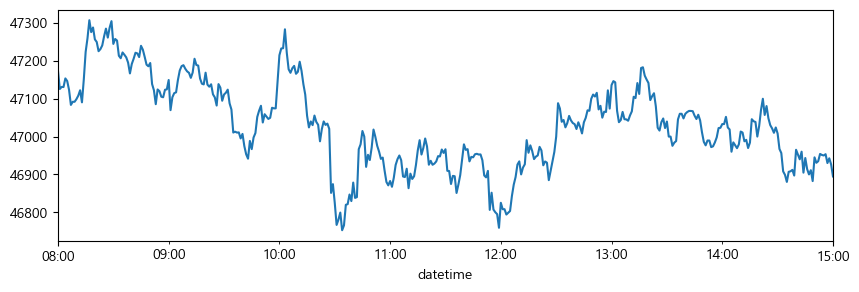

In [29]:
df3.plot(figsize=(10,3))

### 기계학습4
아래의 정의된 컬럼들로 result의 loss와 profit을 예측하는 모델을 만들려고 한다.

- open
- 시작가,종가 가격차이 (open - close)
- algorithm
- t분과 t-5시점의 close값의 차이 (t , t-5)

2022년 2월 ~ 12월까지의 데이터를 train  2023년 1~2월의 데이터를 평가 데이터로 하고 result의 값이 loss,profit인 데이터만 학습에 사용하여     
랜덤포레스트와 서포트 벡터머신 분류모델을 만들고 test데이터에 대해 accuracy를 비교하라. test데이터에 대한 예측 진행시 profit일 확률이 60%이상인 경우에만 profit으로 예측한다

In [34]:
df1.reset_index(drop=True, inplace=True)

In [40]:
df1['open_close'] = df1['open']- df1['close']
for i in range(5,len(df1)):
    df1.loc[i,'diff'] = df1.loc[i, 'close'] - df1.loc[i-5, 'close']

C:\Users\user\AppData\Local\Temp\ipykernel_1472\3872169096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['open_close'] = df1['open']- df1['close']


In [54]:
train = df1[(df1['datetime'].dt.year==2022)&(df1['datetime'].dt.month!=1)]
train = train[train['result'] != 'stay']
train = train[['open','open_close','algorithm','diff','result']]
test = df1[(df1['datetime'].dt.year==2023)&(df1['datetime'].dt.month<3)]
test = test[['open','open_close','algorithm','diff','result']]

In [67]:
trainx = train.drop(columns = 'result')
trainx['algorithm'] = trainx['algorithm'].astype('category').cat.codes
trainy = train['result'].astype('category').cat.codes
testx = test.drop(columns = 'result')
testx['algorithm'] = testx['algorithm'].astype('category').cat.codes
testy = test['result'].astype('category').cat.codes

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(trainx, trainy)
# 확률 예측
rf_proba = rf.predict_proba(testx)

# 확률이 60% 이상인 경우만 profit으로 예측, 그 외는 loss로 예측
rf_pred = np.where(rf_proba[:, 1] >= 0.6, 'profit', 'loss')

# 정확도 계산
rf_accuracy = accuracy_score(testy, rf_pred)
print('Random Forest Accuracy:', rf_accuracy)


sv = SVC(probability=True)
sv.fit(trainx, trainy)
# 확률 예측
sv_proba = sv.predict_proba(testx)

# 확률이 60% 이상인 경우만 profit으로 예측, 그 외는 loss로 예측
sv_pred = np.where(sv_proba[:, 1] >= 0.6, 'profit', 'loss')

# 정확도 계산
sv_accuracy = accuracy_score(testy, sv_pred)
print('SVM Accuracy:', sv_accuracy)

Random Forest Accuracy: 0.0
SVM Accuracy: 0.0


In [71]:
testy

525481    2
525482    2
525483    2
525484    2
525485    2
         ..
610436    2
610437    2
610438    2
610439    2
610440    2
Length: 84960, dtype: int8

### 유저의 카드사용 데이터

데이터 출처 :https://www.kaggle.com/datasets/arjunbhasin2013/ccdata     
dataurl ='./data/user_data.csv'

다음은 Credit Card 데이터셋의 데이터 사전 및 각 컬럼의 한글 번역입니다:

1. **CUST_ID**: 신용카드 보유자 식별

2. **BALANCE**: 계좌에 남아 있는 구매 가능 잔액

3. **BALANCE_FREQUENCY**: 잔액 업데이트 빈도, 0과 1 사이의 점수 (1 = 자주 업데이트됨, 0 = 자주 업데이트되지 않음)

4. **PURCHASES**: 계좌에서의 구매 금액

5. **ONEOFF_PURCHASES**: 한 번에 최대 구매 금액

6. **INSTALLMENTS_PURCHASES**: 할부로 구매한 금액

7. **CASH_ADVANCE**: 사용자가 미리 지급한 현금

8. **PURCHASES_FREQUENCY**: 구매 빈도, 0과 1 사이의 점수 (1 = 자주 구매함, 0 = 자주 구매하지 않음)

9. **ONEOFFPURCHASESFREQUENCY**: 일회성 구매 빈도 (1 = 자주 구매함, 0 = 자주 구매하지 않음)

10. **PURCHASESINSTALLMENTSFREQUENCY**: 할부 구매 빈도 (1 = 자주 구매함, 0 = 자주 구매하지 않음)

11. **CASHADVANCEFREQUENCY**: 현금 선지급 빈도 (1 = 자주 선지급함, 0 = 자주 선지급하지 않음)

12. **CASHADVANCETRX**: 현금 선지급으로 이루어진 거래 수

13. **PURCHASES_TRX**: 구매 거래 수

14. **CREDIT_LIMIT**: 사용자 신용카드의 한도

15. **PAYMENTS**: 사용자가 지불한 금액

16. **MINIMUM_PAYMENTS**: 사용자가 지불한 최소 금액

17. **PRCFULLPAYMENT**: 사용자가 지불한 전체 금액의 백분율

18. **TENURE**: 신용카드 서비스 사용 기간

In [97]:
import pandas as pd
df = pd.read_csv('user_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 기계학습
데이터 EDA를 실시하고 결측치와 이상치를 처리하라 (시각화 포함)

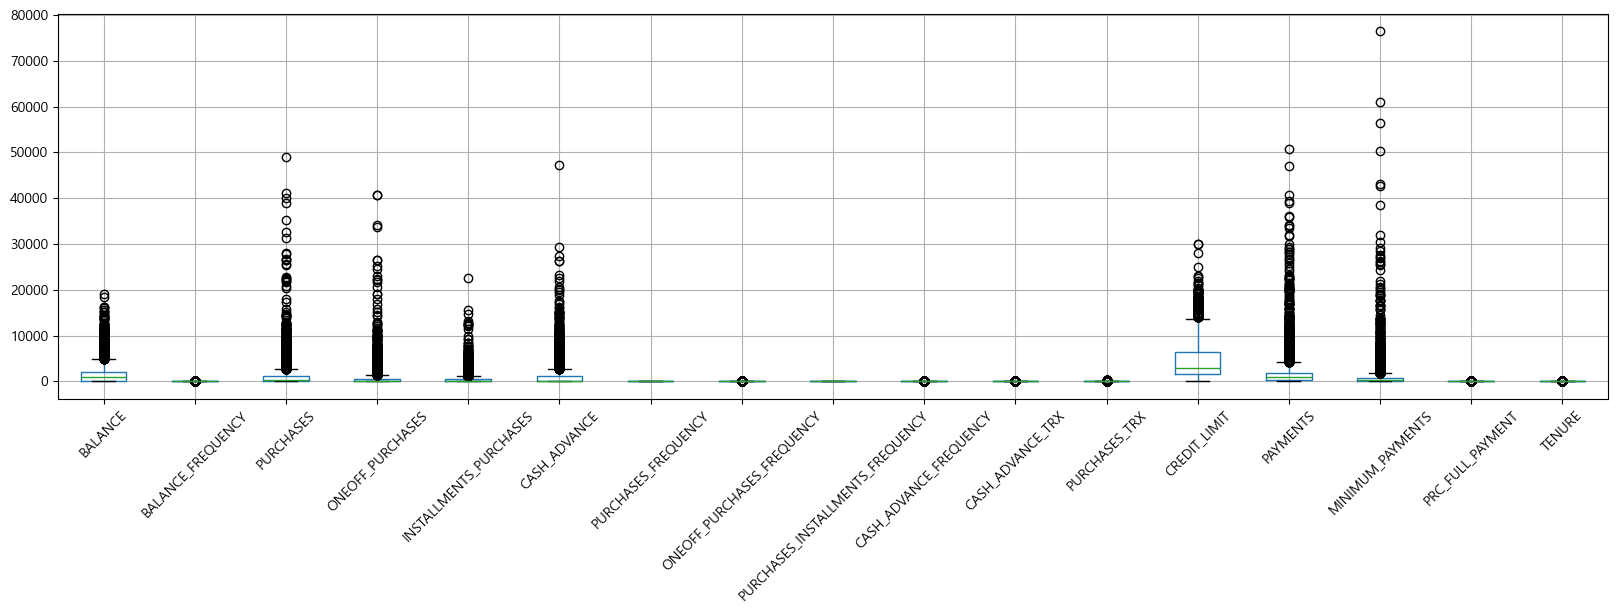

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

아래 박스플랏과 전체 요약을 보면 'BALANCE','PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE''CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS' 컬럼에 이상치가 존자하고'MINIMUM_PAYMENTS'에 이상치가 존재 


In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
df.boxplot()
plt.xticks(rotation=45)
plt.show()

display(df.describe())
display(df.isna().sum())
print('''아래 박스플랏과 전체 요약을 보면 'BALANCE','PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE''CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS' 컬럼에 이상치가 존자하고'MINIMUM_PAYMENTS'에 이상치가 존재 ''')

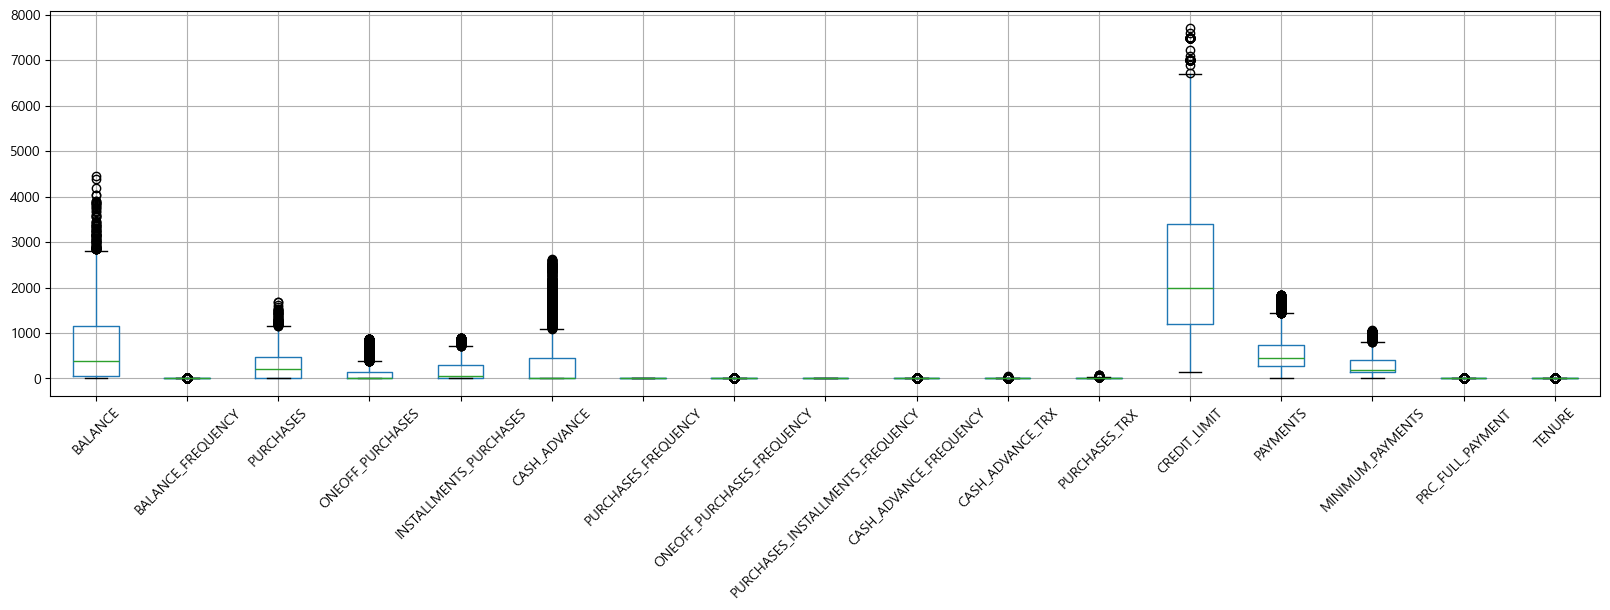

 이상치들이 다수제거 됨을 확인할수 있다


In [99]:
# 이상치 제거
columns = ['BALANCE','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']

for col in columns:
    a,b = df[col].quantile([0.25, 0.75])
    iqr = b-a
    min= a-iqr*1.5
    max= b+iqr*1.5
    df = df[(df[col]>=min)&(df[col]<=max)]
    
plt.figure(figsize=(20,5))
df.boxplot()
plt.xticks(rotation=45)
plt.show()
print(''' 이상치들이 다수제거 됨을 확인할수 있다''')

In [100]:
df.reset_index(drop=True, inplace=True)
display(df.isna().sum())
print('이상치를 제거하니 결측치가 사라져 결측치처리는 따로 제거 하지 않아도 된다')

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

이상치를 제거하니 결측치가 사라져 결측치처리는 따로 제거 하지 않아도 된다


### 기계학습6     
PCA를 통해 적절한 차원으로 데이터를 축소하고 평가하라

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2, the average silhouette_score is : 0.26249249867704705


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3, the average silhouette_score is : 0.21162878158011156


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4, the average silhouette_score is : 0.24376240624692797


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5, the average silhouette_score is : 0.23636766608025842


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6, the average silhouette_score is : 0.20909861800219348


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7, the average silhouette_score is : 0.21745658324997333


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, the average silhouette_score is : 0.23604913035701852


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9, the average silhouette_score is : 0.21753016622757626


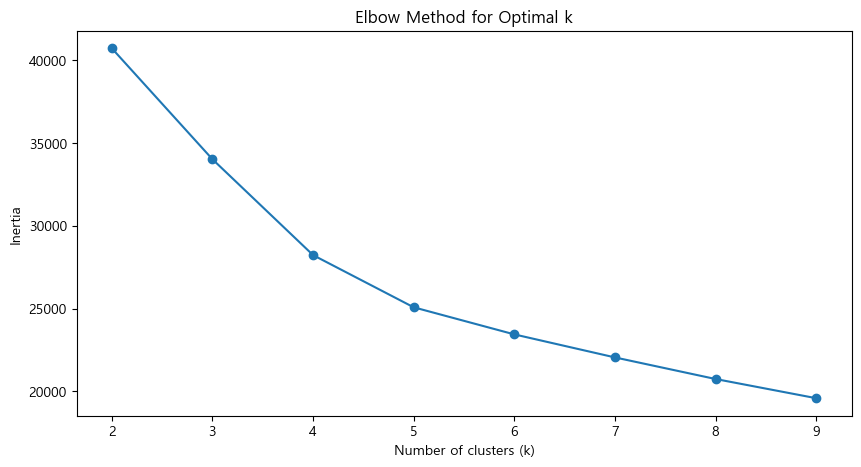

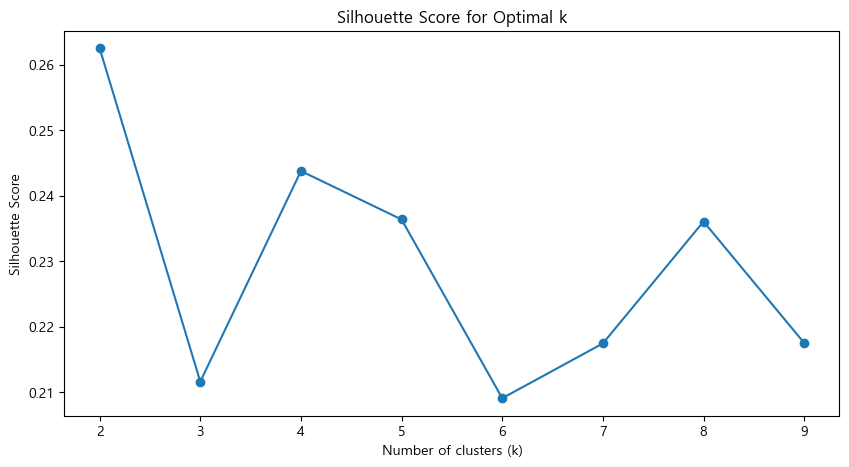

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Drop the 'CUST_ID' column
df = df.drop(columns='CUST_ID')

# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Fit PCA and examine explained variance
model = PCA(n_components=df.shape[1], svd_solver='auto')
pca_result = model.fit_transform(scaled_df)

# Explained variance
e_value = pd.DataFrame({"고윳값": model.explained_variance_,
                        '기여율': model.explained_variance_ratio_})
e_value['누적기여율'] = e_value['기여율'].cumsum()

# Reduce to 6 components
model = PCA(n_components=6, svd_solver='auto')
pca_result = model.fit_transform(scaled_df)

# KMeans clustering and silhouette score calculation
a = []
silhouette_scores = []

for k in range(2, 10):  # k=1의 경우 실루엣 점수를 계산할 수 없습니다
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(pca_result)
    cluster_labels = kmeans.labels_
    
    # Calculate inertia and silhouette score
    a.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(list(range(2, 10)), a, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(list(range(2, 10)), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


In [65]:
e_value.head(6)
print(''' 6개의 속성을 사용하면 80%이사이 설명 가능하다''')

,고윳값,기여율,누적기여율
0,5.141001,0.302338,0.302338
1,2.941534,0.172989,0.475327
2,1.976122,0.116214,0.591541
3,1.485004,0.087332,0.678873
4,1.224991,0.072041,0.750913
5,0.842101,0.049523,0.800437


### 기계학습7     
위의 차원 축소된 데이터를 바탕으로 KMeans 클러스터링을 실시하라.     
응집도와 분리도를 기반으로 적절 클러스터 숫자를 구하고 두개의 주성분 차원에 군집 중심을 포함하여 시각화하라

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


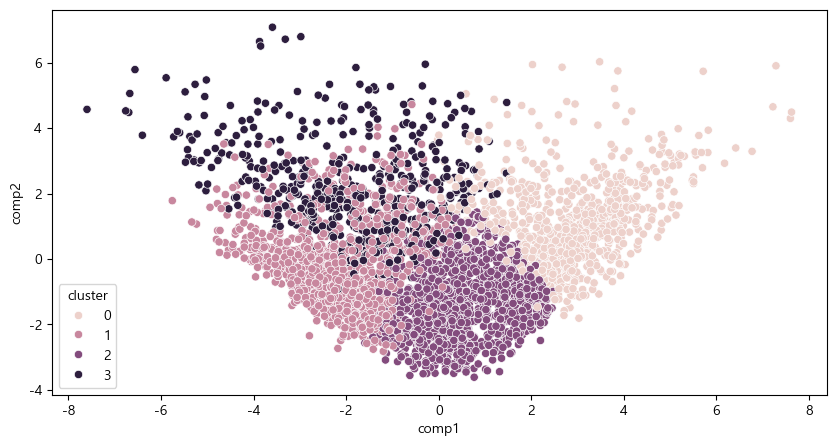

In [103]:
#위에 그래프를 보면 엘보우 기법과 실루엣계수를 확인해 보면 군집을 4개로 할때가 가정 적절합을 볼수 잇다

df1 = pd.DataFrame(pca_result,columns = ['comp1','comp2','comp3','comp4','comp5','comp6'])

model = KMeans(n_clusters=4, random_state=0)
distances = model.fit_transform(df1)
kmeans_result = model.labels_
df1['cluster'] = kmeans_result

plt.figure(figsize=(10,5))
sns.scatterplot(x='comp1',y='comp2', data=df1, hue='cluster')
plt.show()

### 기계학습8   
마케팅 담당자인 당신은 KMeans 군집 결과를 통해 각 군집 특성을 파악하고 군집별 프로모션 전략을 서술하라
    

In [104]:
df1.head(2)

,comp1,comp2,comp3,comp4,comp5,comp6,cluster
0,0.458645,-2.050598,0.293606,-0.727206,-0.599382,-0.725447,2
1,-1.407334,4.555336,4.513838,-0.695272,-0.901153,2.337999,3


In [117]:
df['cluster'] = kmeans_result
temp = df.groupby('cluster').mean()
temp
print(''' 각각의 평균치를 군집교했을때 눈에 띄는 차이가 있는 항목들을 보면
군집 0은 BALANCE ,CASH_ADVANCE,CASH_ADVANCE_TRX,MINIMUM_PAYMENTS 이 높은것으로 보아 현금 보유량이 높고
주로 현금으로 거래하여 현재 안정적인 현금 수입원이 있는 것으로 예상해 볼수 있다.
군집 1는 INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY가 가장 높은것으로 보아 소비가 빈번하지만 할부로 하고 금액인 높지 않다. 
군집 2는 현금보유량도 많지 않고 소비활동도 높지 않은 집단이다.근집 3은 PURCHASES,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_TRX,PAYMENTS 가장 높은
집단으로 소비도 많고, 구매액도 가장높은 것으로 알수잇다. 주소비계층이라고 할수 있다''')

 각각의 평균치를 군집교했을때 눈에 띄는 차이가 있는 항목들을 보면
군집 0은 BALANCE ,CASH_ADVANCE,CASH_ADVANCE_TRX,MINIMUM_PAYMENTS 이 높은것으로 보아 현금 보유량이 높고
주로 현금으로 거래하여 현재 안정적인 현금 수입원이 있는 것으로 예상해 볼수 있다.
군집 1는 INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY가 가장 높은것으로 보아 소비가 빈번하지만 할부로 하고 금액인 높지 않다. 
군집 2는 현금보유량도 많지 않고 소비활동도 높지 않은 집단이다.근집 3은 PURCHASES,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_TRX,PAYMENTS 가장 높은
집단으로 소비도 많고, 구매액도 가장높은 것으로 알수잇다. 주소비계층이라고 할수 있다


1) 군집0 은 돈은 있으나 돈을 잘쓰지 않는 집단으로 이들은 안정적인 소비를 추구한다 할수 있다 이런 안정적인 계층이 찾는 물품들을 찾아 공략하다
2) 군집3이 주 소비계층이라 할수 있다. 이들이 주요 고객이 될수 있게 포인트를 준다거나 3번 구매 했을때는 더 할인 받을수 있는 쿠폰이 나가는
등의 마케팅 전략을 펼친다.

### 기계학습9
병합적 계층군집을 실시하고 덴드로그램을 시각화하라. 군집간 거리는 ward 방식으로 업데이트하며 위 문제에서 구한 최적 군집이 만들어지 지기 위한 거리 범위를 구하라

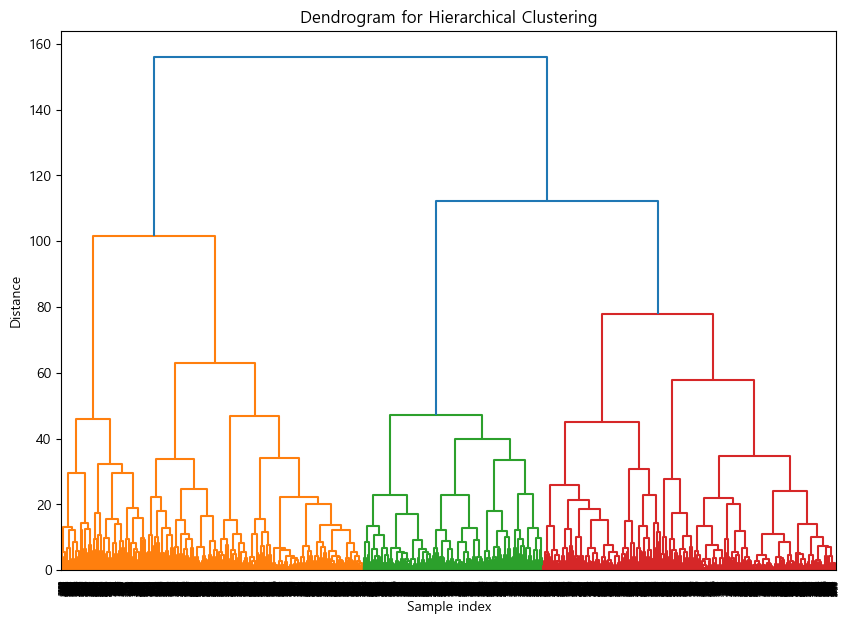

In [125]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Linkage matrix 생성 (ward linkage 사용)
linked = linkage(pca_result, method='ward')

# 덴드로그램 그리기 (df.index를 레이블로 사용)
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df.index.tolist(), leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


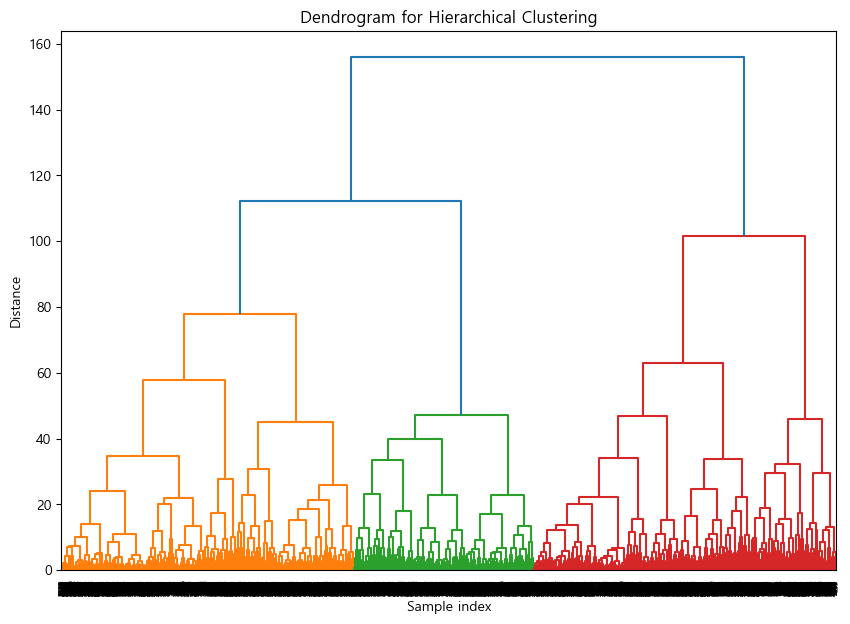

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix
linked = linkage(pca_result, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 통계 (40점)

### 통계1      
어느 자동차 회사의 본사에서 여러 지방 영업소에 내려보낸 43대의 새 차 중 11대에 불량 오디오가 설치되었다고 한다. 어느 영업소가 8대를 인수하였는데 이 중에서 오디오가 불량인 차가 적어도 2대 이상이 될 확률을 구하라.

In [164]:
1-(32/43)**8+(11/43)*(32/43)**7 

0.9382664149663168

In [165]:
from scipy.stats import hypergeom

# 매개변수 설정
M = 43  # 전체 차 대수
n = 11  # 불량 오디오가 설치된 차 대수
N = 8   # 영업소가 인수한 차 대수

# P(X = 0) 및 P(X = 1) 계산
prob_0 = hypergeom.pmf(0, M, n, N)
prob_1 = hypergeom.pmf(1, M, n, N)

# P(X >= 2) 계산
prob_2_or_more = 1 - (prob_0 + prob_1)

print("P(X >= 2):", prob_2_or_more)


P(X >= 2): 0.6721384488647228


### 통계2
data_path = ./data/stats_reg1.csv     
종속변수 : Target   
독립변수 : 다양한 센서데이터

In [126]:
import pandas as pd
df =pd.read_csv('stats_reg1.csv')
df.head()

,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,Target
0,0.296120,-1.463515,-0.327662,0.005113,-0.702053,0.097078,-0.392108,0.261055,0.968645,2,3,1.475520,-0.363724,-0.503583,-1.464364,7.709164
1,1.579213,-0.234137,1.523030,-0.469474,0.647689,0.496714,-0.234153,0.767435,-0.138264,2,1,0.387250,0.907459,0.928492,0.938609,264.129513
2,-0.562467,0.707752,-0.626967,0.972554,1.770801,-0.703176,1.812449,0.632408,-0.034988,2,2,0.955285,-0.096463,-0.030130,2.166524,211.602064
3,1.496044,-1.778720,-0.773789,-0.055585,1.876796,1.355638,-1.244655,0.654366,0.413435,2,1,0.441394,0.352448,-0.467829,2.433214,273.654357
4,-0.759133,-0.525755,-0.599393,0.341756,-0.839722,2.189803,-2.123896,0.150394,-0.808298,1,2,0.991974,-0.562178,-0.176573,-0.068282,-158.208708


### 통계2-1
변수들의 다중공선성을 검토하라


In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

X = df.drop(columns='Target')
Y = df['Target']
vifs = [VIF(X.values,i) for i in range(X.shape[1])]

In [139]:
pd.DataFrame(vifs, index= X.columns, columns = ['VIF'])
print(''' VIF를 검토 하였을때 F_1,F_2,F_11,F_12,F_13이 다중공선성이 10 이상이 
나온다''')

 VIF를 검토 하였을때 F_1,F_2,F_11,F_12,F_13이 다중공선성이 10 이상이 
나온다


### 통계2-2
다중공선성 문제를 해결하기 위한 방법 2가지를 제시하고, 하나를 선택하여 적용하라


1)VIF가 10보다 높게 나오는 독립변수를 제거
2) PCA를 통해 독립변수의 수를 줄인다.

### 통계2-3
2-2의 방법을 전,후의 회귀 분석 모델의 결과를 비교하라


In [140]:
import statsmodels.api as sm

XC = sm.add_constant(X)
model = sm.OLS(Y, XC)
fitted = model.fit()
resid = fitted.resid
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.230e+07
Date:                Mon, 26 Aug 2024   Prob (F-statistic):          3.61e-277
Time:                        13:48:26   Log-Likelihood:                 108.69
No. Observations:                 100   AIC:                            -185.4
Df Residuals:                      84   BIC:                            -143.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0314      0.039      0.814      0.4

In [142]:
x1 = X.drop(columns = ['F_1','F_2','F_11','F_12','F_13'])
XC = sm.add_constant(x1)
model = sm.OLS(Y, XC)
fitted = model.fit()
resid = fitted.resid
print(fitted.summary())
print( ' 독립변수를 제거하기 전후를 비교했을 때 독립변수를 제거 후의 jarque-bera 값이 감소,
    왜도는 0에 가까워졌고 첨도 또한 정규분포 0에 가까워졌음을 볼수 있다 다중공선성을 증가시키는 
      독립변수를 제거하니 그래프가 정규분포에 가까워 짐을 확인할수 있다.')

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     109.4
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.47e-45
Time:                        13:50:07   Log-Likelihood:                -540.32
No. Observations:                 100   AIC:                             1103.
Df Residuals:                      89   BIC:                             1131.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1807     16.872     -0.129      0.8

### 통계 3     
data_path = ./data/stats_reg1.csv
- 어느 학급의 학생들이 3가지(Lecture,Online,Blended)방식으로 학습하고 시험을 본 결과이다.


### 통계 3-1
3가지 방식 각각 점수 분포가 정규성을 만족하는지와 방식들간의 분산은 동일한지 검정하라

In [157]:
from scipy.stats import shapiro,levene

df = pd.read_csv('learn.csv')
df.info()
print(shapiro(df['Lecture']))
print(shapiro(df['Online']))
print(shapiro(df['Blended']))
print('''
   귀무가설: 표본의 모집단이 정규분포와 차이가 없다(정규성만족)
   대립가설: 표본의 모집단이 정규분포와 차이가 있다(정규성 만족하지 않느다)
   결과를 보면 'Lecture' 방식을 제외하고는 정규성을 만족한다''')

levene_test = levene(df['Lecture'], df['Online'], df['Blended'])
print(levene_test)
print('''귀무가설: 집단간 모분산에는 차이가 없다
        대립가설: 집단간 모분산이 같다고 할수 없다
        pvalue가 0.05 보다 작아 집단간 모분산이 같지 않다''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  30 non-null     int64  
 1   Lecture  30 non-null     float64
 2   Online   30 non-null     float64
 3   Blended  30 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB
ShapiroResult(statistic=0.8893252611160278, pvalue=0.004649867303669453)
ShapiroResult(statistic=0.9835424423217773, pvalue=0.9098509550094604)
ShapiroResult(statistic=0.9627746939659119, pvalue=0.36398041248321533)

   귀무가설: 표본의 모집단이 정규분포와 차이가 없다(정규성만족)
   대립가설: 표본의 모집단이 정규분포와 차이가 있다(정규성 만족하지 않느다)
   결과를 보면 'Lecture' 방식을 제외하고는 정규성을 만족한다
LeveneResult(statistic=10.915293805906348, pvalue=5.894135513581264e-05)
귀무가설: 집단간 모분산에는 차이가 없다
        대립가설: 집단간 모분산이 같다고 할수 없다
        pvalue가 0.05 보다 작아 집단간 모분산이 같지 않다


### 통계 3-2
위 결과에 맞는 그룹간 점수 분포 차이가 존재하는지를 확인하는 통계 검정 전략을 설명하라

In [159]:
# 세그룹중 한그룹이 정규성을 만족하지 못하고 집단간 모문산이 같다고도 할수 없음으로
# 비모수로 보고 크루스칼로 접근하다


### 통계 3-3
가설에 따른 검정을 수행하고, 검정통계량과 p-value를 설명하라

In [162]:
from scipy.stats import kruskal

kruskal_result = kruskal(df['Lecture'], df['Online'], df['Blended'])
print("Kruskal-Wallis H Test result: ", kruskal_result)
print('''pvalue 가 0.05 보다 작게 나옮으로 그룹간 점수 분포에 차이가 있다''')

Kruskal-Wallis H Test result:  KruskalResult(statistic=43.414247572948724, pvalue=3.738659570093248e-10)
pvalue 가 0.05 보다 작게 나옮으로 그룹간 점수 분포에 차이가 있다
